# The Sparks Foundation - GRIP
# Data Science and Business Analytics Intern October 2022

## Name: Huzaifa azhar.
## Problem Statement: Predict the percentage of a student based on no. of study hours. (Using Supervised ML)

### DataSet Link: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

### "Python Libraries for Problem solving"

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Loading the url and cconverting into a dataframe
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [3]:
#displaying first five rows
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#displaying last five rows
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### The data set contains two columns, Hours and Scores and 25 rows

**Now, going through the structure of the given dataset and performing EDA on the dataset**

In [5]:
#Tells how many rows and columns in the dataset.
df.shape

(25, 2)

In [6]:
#Checking datatypes of both the columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
#Shows statistics of the data set.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Insights of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Correlation between both the entities
df[['Hours', 'Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Plotting the dataset

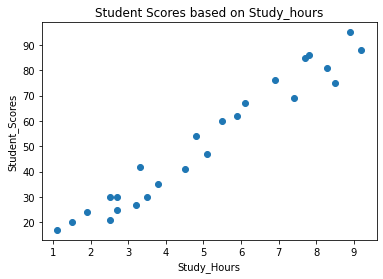

In [10]:
#Plotting a scatter plot
plt.scatter(x='Hours', y='Scores', data=df)
plt.xlabel('Study_Hours')
plt.ylabel("Student_Scores")
plt.title("Student Scores based on Study_hours")
plt.show()

(0.0, 101.96371328211224)

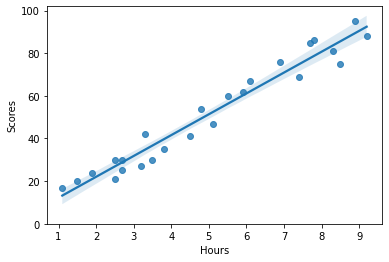

In [11]:
#Plotting both entites in a scatterplot to better understand the relation.
sns.regplot(x='Hours', y='Scores', data=df)
plt.ylim(0,)


*The graph shows a positive linear relationship, means, direct relation between hours and scores.*

### "Developing the Model"

In [12]:
#Developing linear regression model
lm = LinearRegression()
lm

LinearRegression()

In [13]:
X = df[['Hours']]
Y = df[['Scores']]

In [14]:
#Splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print("Number of Test samples :", x_test.shape[0])
print("Number of Training samples:",x_train.shape[0])

Number of Test samples : 5
Number of Training samples: 20


In [15]:
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
lm.coef_

array([[9.68207815]])

In [17]:
lm.intercept_

array([2.82689235])

In [18]:
lm.predict(X)

array([[27.03208774],
       [52.20549094],
       [33.80954245],
       [85.12455667],
       [36.71416589],
       [17.35000959],
       [91.90201137],
       [56.0783222 ],
       [83.18814104],
       [28.96850337],
       [77.37889414],
       [59.95115347],
       [46.39624405],
       [34.77775026],
       [13.47717832],
       [88.99738793],
       [27.03208774],
       [21.22284085],
       [61.8875691 ],
       [74.4742707 ],
       [28.96850337],
       [49.3008675 ],
       [39.61878934],
       [69.63323162],
       [78.34710196]])

In [19]:
pred = lm.predict(x_test)
pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [20]:
pd.DataFrame(np.c_[x_test, y_test, pred], columns = ['Hours', 'Original_Marks', 'Predicted_Marks'])

,Hours,Original_Marks,Predicted_Marks
0,8.3,81.0,83.188141
1,2.5,30.0,27.032088
2,2.5,21.0,27.032088
3,6.9,76.0,69.633232
4,5.9,62.0,59.951153


#### "Checking efficiency of the Model"

In [21]:
#Calculating R^2 on test data
lm.score(x_test, y_test)

0.9678055545167994

In [22]:
#Calculating r^2 on training data
lm.score(x_train, y_train)

0.9491209376364416

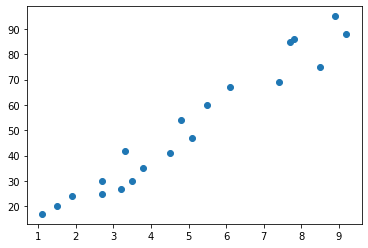

In [23]:
plt.scatter(x_train, y_train)

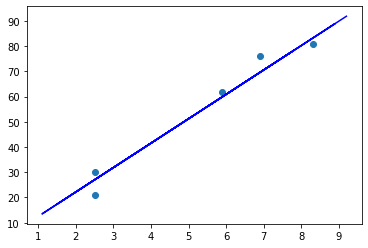

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lm.predict(x_train), color='b')

##### *Conclusion: The Model is performing well enough by an R^2 value of 90+ on both, test and training set*